In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data
df_beers_BA = pd.read_csv('./BeerAdvocate/beers.csv')
# df_reviews_BA = pd.read_csv('./BeerAdvocate/ratings.txt/ratings.txt', sep='\t')

df_beers_RB = pd.read_csv('./RateBeer/beers.csv')
# df_breweries_RB = pd.read_csv('./RateBeer/breweries.csv')
# df_users_RB = pd.read_csv('./RateBeer/users.csv')

  


In [3]:
# #convert txt to csv by keeping only the columns we need
# # Define file paths and column names
# input_file_path = './RateBeer/ratings.txt/ratings.txt'
# output_file_path = './RateBeer/ratings.csv'
# columns = [
#     'beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'date',
#     'user_name', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 
#     'overall', 'rating'
# ]  # "text" and "review" are excluded

# # Custom function to parse each entry as a dictionary, ignoring "text" and "review"
# def parse_entry(lines):
#     entry = {}
#     for line in lines:
#         if ': ' in line:
#             key, value = line.split(': ', 1)
#             if key not in ['text', 'review']:  # Skip "text" and "review" columns
#                 entry[key] = value.strip()
#     return entry

# # Initialize list to store parsed data (process in chunks to avoid memory issues)
# data = []
# entry_lines = []

# # Open the file and process each line
# with open(input_file_path, 'r', encoding='utf-8') as file:
#     for line in file:
#         if line.strip():  # Collect lines for one entry
#             entry_lines.append(line.strip())
#         else:
#             if entry_lines:  # Parse the collected lines and reset for the next entry
#                 data.append(parse_entry(entry_lines))
#                 entry_lines = []
#     # Parse the last entry if the file doesn't end with a blank line
#     if entry_lines:
#         data.append(parse_entry(entry_lines))

# # Convert to DataFrame directly from the parsed data
# df = pd.DataFrame(data, columns=columns)

# # Save the DataFrame to a CSV file without the discarded columns
# df.to_csv(output_file_path, index=False, encoding='utf-8')

# # Confirm file saved successfully
# print(f"Data saved to {output_file_path}")


In [19]:
example_time = 1438423200

def convert_unix_to_datetime(unix_time):
    return pd.to_datetime(unix_time, unit='s')
 
print(convert_unix_to_datetime(example_time))   

2015-08-01 10:00:00


In [28]:
df_ratings_BA = pd.read_csv('./BeerAdvocate/ratings.csv')
print(df_ratings_BA.head())

df_ratings_RB = pd.read_csv('./RateBeer/ratings.csv')
print(df_ratings_RB.head())

       beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
4  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv        date        user_name  \
0       37262   Euro Pale Lager  4.5  1440064800          nmann08   
1       10093  English Pale Ale  4.5  1235127600      StJamesGate   
2       10093  English Pale Ale  4.5  1142247600          mdagnew   
3       10093  English Pale Ale  4.5  1101898800  helloloser12345   
4       10093  English Pale Ale  4.5  1093860000       cypressbob   

                 user_id  appearance  aroma  palate  taste  overall  rating  
0         nmann08.184925        3.25   2.75    3.25   2.75      3.0    2.8

In [29]:
#convert date to datetime, keep only days
df_ratings_BA['date'] = pd.to_datetime(df_ratings_BA['date'], origin='unix', unit='s').dt.date
print(df_ratings_BA.head())
df_ratings_RB['date'] = pd.to_datetime(df_ratings_RB['date'], origin='unix', unit='s').dt.date
print(df_ratings_RB.head())


       beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
4  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv        date        user_name  \
0       37262   Euro Pale Lager  4.5  2015-08-20          nmann08   
1       10093  English Pale Ale  4.5  2009-02-20      StJamesGate   
2       10093  English Pale Ale  4.5  2006-03-13          mdagnew   
3       10093  English Pale Ale  4.5  2004-12-01  helloloser12345   
4       10093  English Pale Ale  4.5  2004-08-30       cypressbob   

                 user_id  appearance  aroma  palate  taste  overall  rating  
0         nmann08.184925        3.25   2.75    3.25   2.75      3.0    2.8

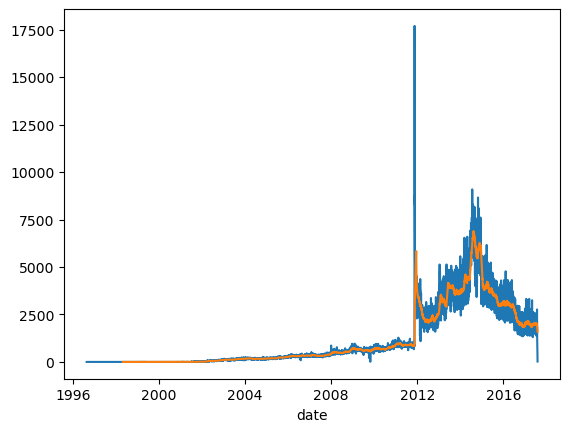

In [ ]:

#plot number of reviews per day
df_ratings_BA['date'].value_counts().sort_index().plot()

#add 5 days moving average
df_ratings_BA['date'].value_counts().sort_index().rolling(window=30).mean().plot()

plt.show()

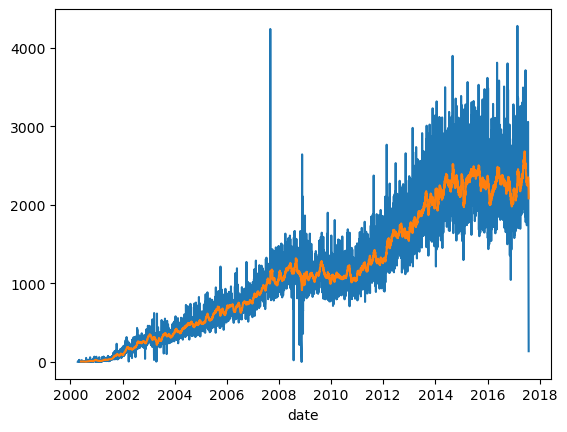

In [32]:
#plot number of reviews per day
df_ratings_RB['date'].value_counts().sort_index().plot()

#add 5 days moving average
df_ratings_RB['date'].value_counts().sort_index().rolling(window=30).mean().plot()

plt.show()

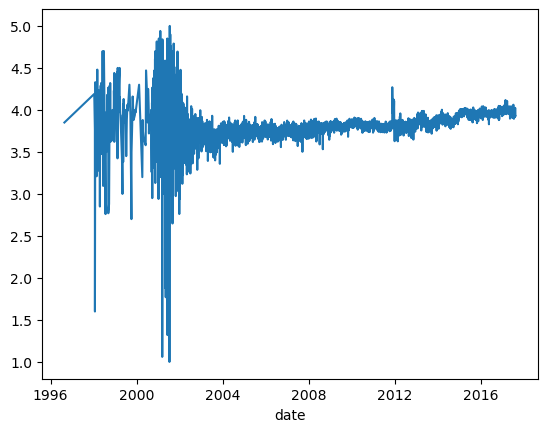

In [33]:
#look at the evolution of the average grade over time
df_ratings_BA.groupby('date')['rating'].mean().plot()
plt.show()

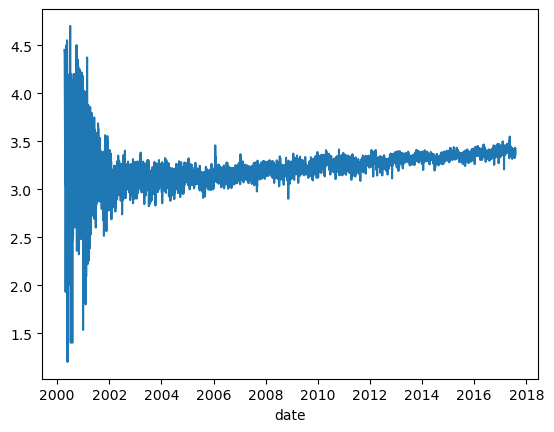

In [36]:
df_ratings_RB.groupby('date')['rating'].mean().plot()

plt.show()

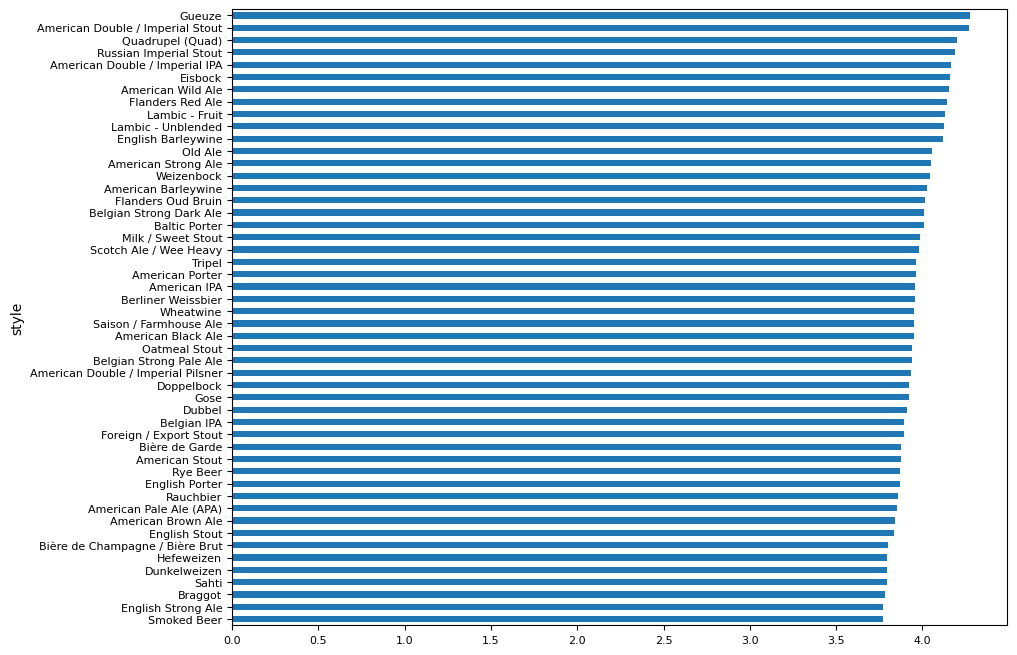

In [41]:
#average grade per type of beer
# Plot only the top 20 beer styles by average rating
top_styles = df_ratings_BA.groupby('style')['rating'].mean().sort_values().tail(50)
top_styles.plot(kind='barh', figsize=(10, 8), fontsize=8)

plt.show()

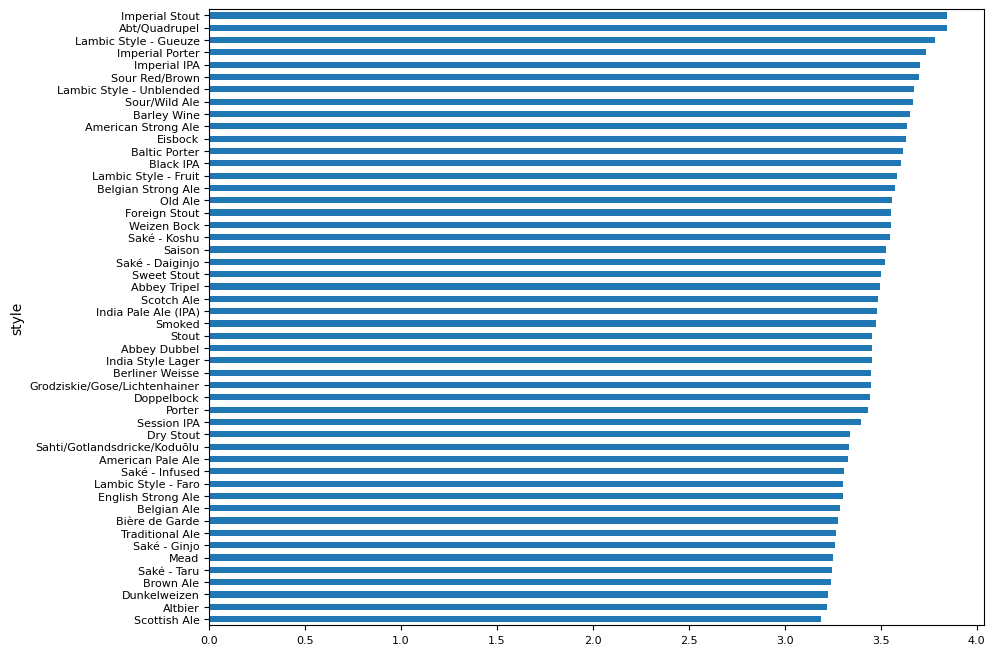

In [ ]:
top_styles = df_ratings_RB.groupby('style')['rating'].mean().sort_values().tail(50)
top_styles.plot(kind='barh', figsize=(10, 8), fontsize=8)

plt.show()

<Axes: ylabel='style'>

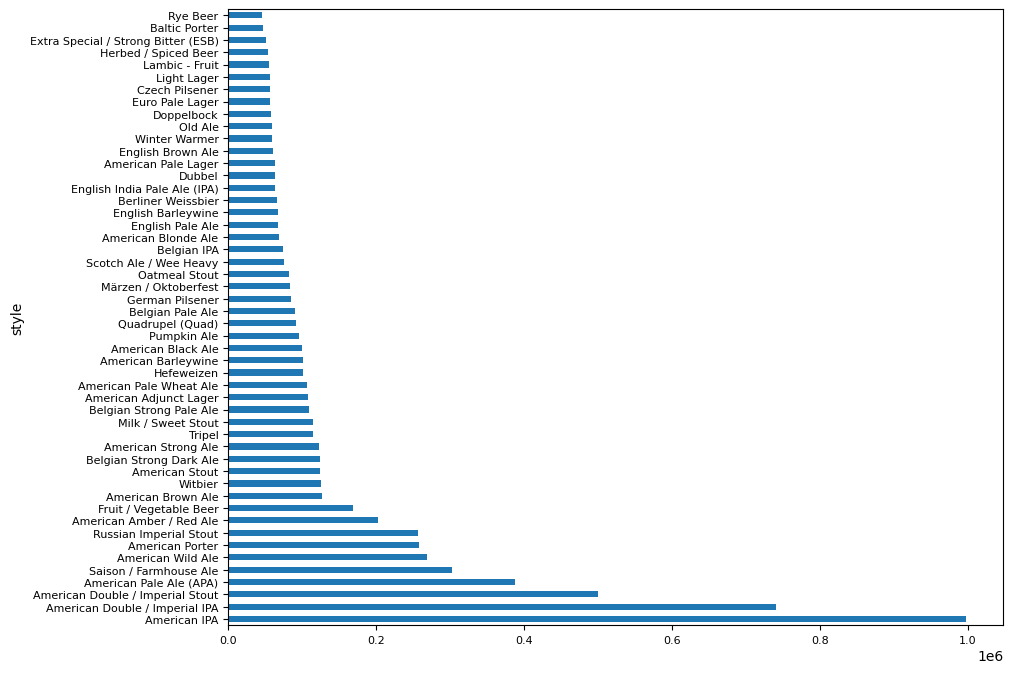

In [52]:
#plot the number of reviews per style
number_of_reviews_per_style = df_ratings_BA['style'].value_counts().head(50)
number_of_reviews_per_style.plot(kind='barh', figsize=(10, 8), fontsize=8)


In [ ]:
#create a seasonal dataframe by keeping only the month and day
df_ratings_BA['date'] = pd.to_datetime(df_ratings_BA['date'])
df_ratings_BA['month_day'] = df_ratings_BA['date'].dt.strftime('%m-%d')
print(df_ratings_BA.head())



       beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
4  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv       date        user_name  \
0       37262   Euro Pale Lager  4.5 2015-08-20          nmann08   
1       10093  English Pale Ale  4.5 2009-02-20      StJamesGate   
2       10093  English Pale Ale  4.5 2006-03-13          mdagnew   
3       10093  English Pale Ale  4.5 2004-12-01  helloloser12345   
4       10093  English Pale Ale  4.5 2004-08-30       cypressbob   

                 user_id  appearance  aroma  palate  taste  overall  rating  \
0         nmann08.184925        3.25   2.75    3.25   2.75      3.0    2.88   


In [56]:
df_ratings_RB['date'] = pd.to_datetime(df_ratings_RB['date'])
df_ratings_RB['month_day'] = df_ratings_RB['date'].dt.strftime('%m-%d')

<Axes: xlabel='month_day'>

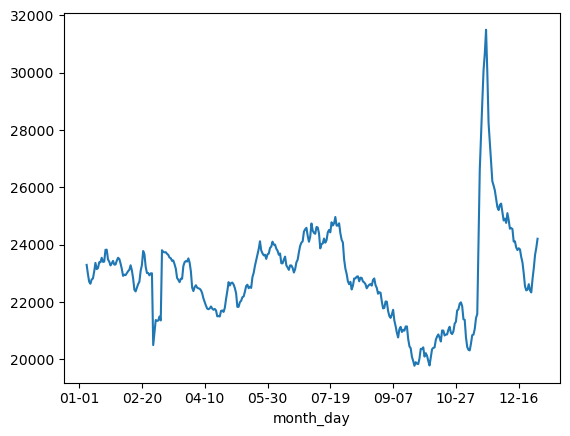

In [73]:
#plot the number of reviews per day of the year

#Not perfect as should be normalized for each year

number_of_reviews_per_day_BA = df_ratings_BA['month_day'].value_counts().sort_index().rolling(window=7).mean() 
number_of_reviews_per_day_BA.plot()

<Axes: xlabel='month_day'>

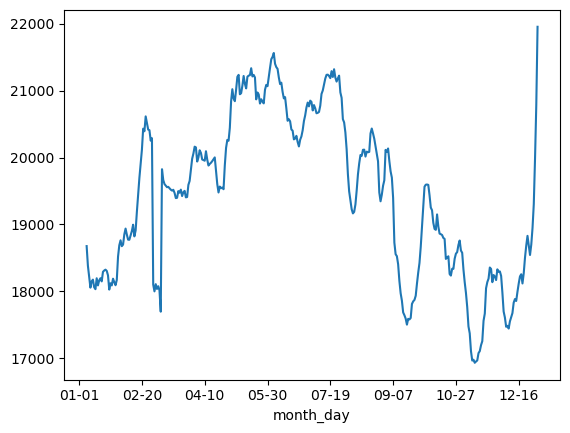

In [72]:
number_of_reviews_per_day_RB = df_ratings_RB['month_day'].value_counts().sort_index().rolling(window=7).mean() 
number_of_reviews_per_day_RB.plot()

In [82]:
top_styles_BA = df_ratings_BA.groupby('style')['rating'].mean().sort_values().tail(5)
print(top_styles_BA)
top_styles_RB = df_ratings_RB.groupby('style')['rating'].mean().sort_values().tail(5)
print(top_styles_RB)

style
American Double / Imperial IPA      4.163593
Russian Imperial Stout              4.189310
Quadrupel (Quad)                    4.199219
American Double / Imperial Stout    4.269590
Gueuze                              4.276374
Name: rating, dtype: float64
style
Imperial IPA             3.703330
Imperial Porter          3.737571
Lambic Style - Gueuze    3.781711
Abt/Quadrupel            3.844325
Imperial Stout           3.846850
Name: rating, dtype: float64


<Axes: xlabel='month_day'>

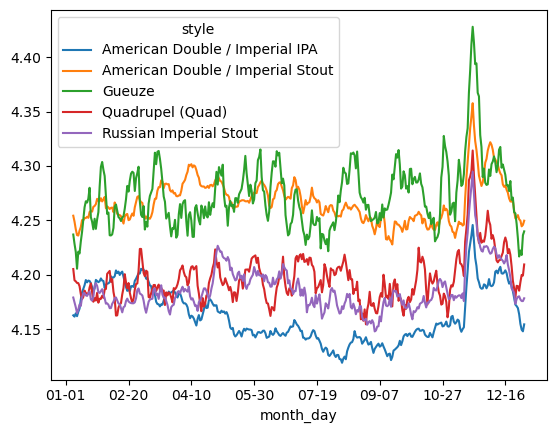

In [83]:
#average grade (rolling average) per type of beer for top_styles on seasonal data
df_ratings_BA_top = df_ratings_BA[df_ratings_BA['style'].isin(top_styles_BA.index)]
df_ratings_BA_top.groupby(['style', 'month_day'])['rating'].mean().unstack('style').rolling(window=7).mean().plot()


<Axes: xlabel='month_day'>

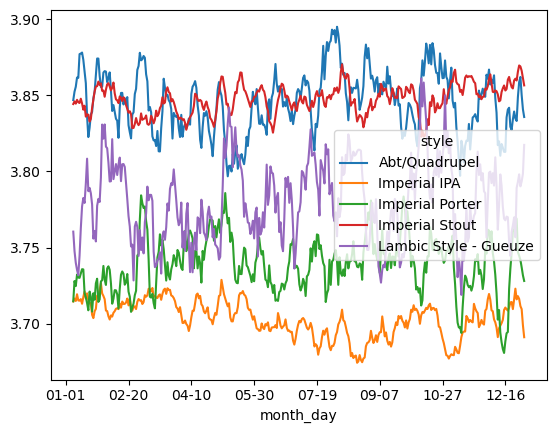

In [84]:
df_ratings_RB_top = df_ratings_RB[df_ratings_RB['style'].isin(top_styles_RB.index)]
df_ratings_RB_top.groupby(['style', 'month_day'])['rating'].mean().unstack('style').rolling(window=7).mean().plot()